# Exploratory Data Analysis - Predicting Lifetime of Members

In [200]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("ga-ds data for final project.csv")

In [201]:
data=data.drop('Unnamed: 15', axis=1)
data=data.drop('Unnamed: 16', axis=1)
data=data.drop('Unnamed: 17', axis=1)
data=data.drop('Unnamed: 18', axis=1)
data=data.drop('Corporate Name', axis=1)
data=data.drop('Checkin 4WK Segment', axis=1)

In [202]:
data.rename(index=str, columns={'Preferred Facility Accounting Code':'Facility',
                                'Monthly Equivalent':'Price', 'Summary Month Key':'Month Key',
                               'Member Tenure Days':'Tenure Days',
                               'Membership Status Desc':'Status',
                               'Checkin MTD Count':'Monthly CI',
                               'PL Purchase MTD Amt':'PL $ MTD',
                               'PT Purchase MTD Amt':'PT $ MTD',
                               'PL Purchase In Month':'PL Ct MTD',
                               'PT Purchase In Month':'PT Ct MTD'}, inplace=True)

In [203]:
data.head(5)

,Member Id,Month Key,Status,Gender,Facility,Access,Price,Monthly CI,PL $ MTD,PL Ct MTD,PT $ MTD,PT Ct MTD,Tenure Days
0,1000006587,20150531,Active,F,106,Select,128.0,5,0,0,0.0,0,5142
1,1000006587,20150630,Active,F,106,Select,128.0,1,0,0,0.0,0,5172
2,1000006587,20150731,Cancelled,F,106,Select,128.0,0,0,0,0.0,0,5203
3,1000006587,20150430,Active,F,106,Select,128.0,4,0,0,0.0,0,5111
4,1000006587,20130630,Active,F,106,Select,120.0,12,0,0,0.0,0,4442


In [204]:
data.dtypes

Member Id        int64
Month Key        int64
Status          object
Gender          object
Facility         int64
Access          object
Price          float64
Monthly CI       int64
PL $ MTD         int64
PL Ct MTD        int64
PT $ MTD       float64
PT Ct MTD        int64
Tenure Days     object
dtype: object

In [205]:
data['Month Key']=data['Month Key'].astype(str)
data['Member Id']=data['Member Id'].astype(str)
data['Facility']=data['Facility'].astype(str)

In [206]:
data['Tenure Days']=pd.to_numeric(data['Tenure Days'], errors='coerce' )

In [207]:
data.dropna(axis=0, how='any', inplace=True)

In [208]:
data.describe()

,Price,Monthly CI,PL $ MTD,PL Ct MTD,PT $ MTD,PT Ct MTD,Tenure Days
count,124137.000000,124137.000000,124137.000000,124137.000000,124137.000000,124137.000000,1.241370e+05
mean,153.694016,6.668890,2.862466,0.003899,42.343535,0.032649,1.855556e+02
std,29.409256,6.501778,66.229794,0.062320,290.463303,0.177718,4.828960e+04
min,92.000000,0.000000,-612.000000,0.000000,-2640.000000,0.000000,-2.917010e+06
25%,128.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.260000e+02
50%,160.000000,5.000000,0.000000,0.000000,0.000000,0.000000,5.930000e+02
75%,175.000000,10.000000,0.000000,0.000000,0.000000,0.000000,1.312000e+03
max,417.000000,98.000000,8640.000000,1.000000,9888.000000,1.000000,9.223000e+03


In [209]:
data['Year']=data['Month Key'].str[:4]

In [210]:
data=data[data['Tenure Days']>=0]

In [211]:
data=data[data['PT $ MTD']>=0]

In [212]:
data=data[data['PL $ MTD']>=0]

In [213]:
data.head()

,Member Id,Month Key,Status,Gender,Facility,Access,Price,Monthly CI,PL $ MTD,PL Ct MTD,PT $ MTD,PT Ct MTD,Tenure Days,Year
0,1000006587,20150531,Active,F,106,Select,128.0,5,0,0,0.0,0,5142.0,2015
1,1000006587,20150630,Active,F,106,Select,128.0,1,0,0,0.0,0,5172.0,2015
2,1000006587,20150731,Cancelled,F,106,Select,128.0,0,0,0,0.0,0,5203.0,2015
3,1000006587,20150430,Active,F,106,Select,128.0,4,0,0,0.0,0,5111.0,2015
4,1000006587,20130630,Active,F,106,Select,120.0,12,0,0,0.0,0,4442.0,2013


In [214]:
data['PT Ct MTD'].value_counts()

0    120023
1      4041
Name: PT Ct MTD, dtype: int64

In [215]:
sum(data['PT $ MTD']>0)

4025

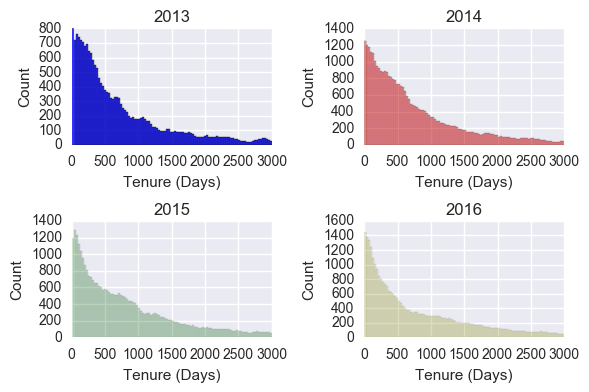

In [216]:
import matplotlib.pyplot as plt
%matplotlib inline

fig=plt.figure()

ax1=fig.add_subplot(221)
#plt.figure(1, figsize=(4,3));
ax1.hist(data[data['Year']=='2013']['Tenure Days'], bins=100, range=(0,3000), alpha=0.8, color='b', label="2013")
plt.xlabel('Tenure (Days)')
plt.ylabel('Count')
plt.title('2013')

ax2=fig.add_subplot(222)
#plt.figure(2, figsize=(4,3));
ax2.hist(data[data['Year']=='2014']['Tenure Days'], bins=100, range=(0,3000), alpha=0.4, color='r', label="2014")
plt.xlabel('Tenure (Days)')
plt.ylabel('Count')
plt.title('2014')

ax3=fig.add_subplot(223)
#plt.figure(3, figsize=(4,3));
ax3.hist(data[data['Year']=='2015']['Tenure Days'], bins=100, range=(0,3000), alpha=0.2, color='g', label="2015")
plt.xlabel('Tenure (Days)')
plt.ylabel('Count')
plt.title('2015')

ax4=fig.add_subplot(224)
#plt.figure(4, figsize=(4,3));
ax4.hist(data[data['Year']=='2016']['Tenure Days'], bins=100, range=(0,3000), alpha=0.2, color='y', label="2016")
plt.xlabel('Tenure (Days)')
plt.ylabel('Count')
plt.title('2016')

plt.tight_layout()
fig=plt.gcf()
#plt.legend()
#plt.show()

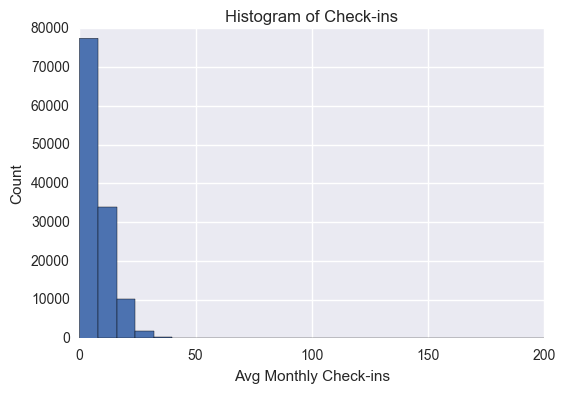

In [217]:
plt.hist(data['Monthly CI'], bins=25, range=(0,200))
plt.xlabel('Avg Monthly Check-ins')
plt.ylabel('Count')
plt.title('Histogram of Check-ins')

### Focus on Members who check-in everyday (or more)

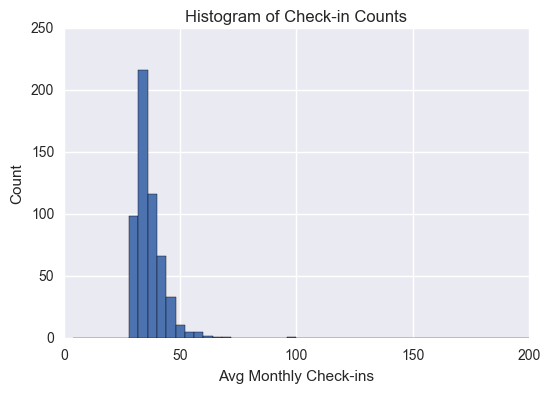

In [218]:
plt.hist(data[data['Monthly CI']>30]['Monthly CI'], bins=50, range=(0,200))
plt.xlabel('Avg Monthly Check-ins')
plt.ylabel('Count')
plt.title('Histogram of Check-in Counts')

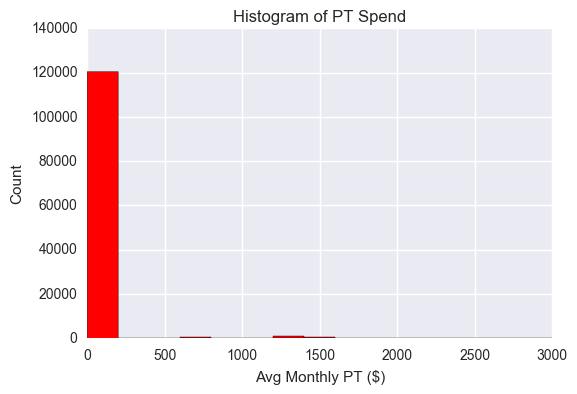

In [219]:
plt.hist(data['PT $ MTD'], bins=15, range=(0,3000), color='r')
plt.xlabel('Avg Monthly PT ($)')
plt.ylabel('Count')
plt.title('Histogram of PT Spend')

### Focus on PT Purchasing Members

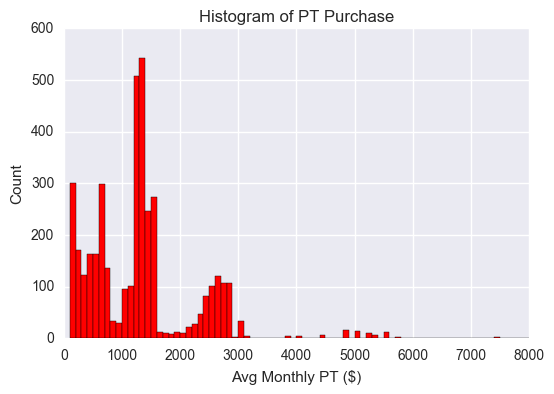

In [220]:
plt.hist(data[data['PT $ MTD']>100]['PT $ MTD'], bins=80, range=(0,8000), color='r')
plt.xlabel('Avg Monthly PT ($)')
plt.ylabel('Count')
plt.title('Histogram of PT Purchase')

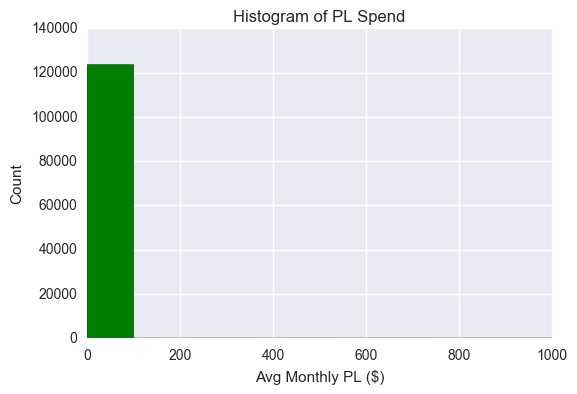

In [221]:
plt.hist(data['PL $ MTD'], bins=10, range=(0,1000), color='g')
plt.xlabel('Avg Monthly PL ($)')
plt.ylabel('Count')
plt.title('Histogram of PL Spend')

### Focus on PL Purchasing Members

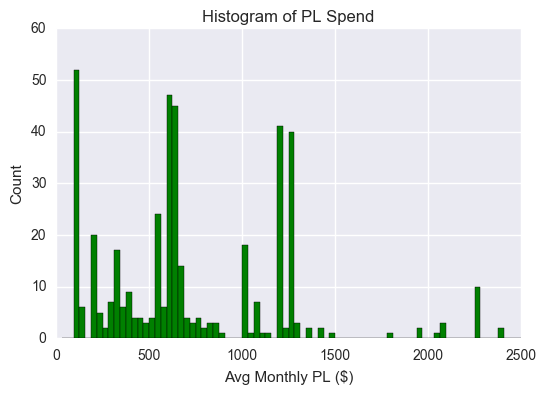

In [222]:
plt.hist(data[data['PL $ MTD']>100]['PL $ MTD'], bins=80, range=(0,2500), color='g')
plt.xlabel('Avg Monthly PL ($)')
plt.ylabel('Count')
plt.title('Histogram of PL Spend')

### Add Current Member Indicator

In [223]:
##Since we have data up until Dec 2016, fix it as the current date
def current_mbr (row):
   if row['Month Key'] == '20161231' :
      return '1'
   return '0'

In [224]:
data.apply (lambda row: current_mbr (row), axis=1)
data['current_mbr'] = data.apply (lambda row: current_mbr (row),axis=1)

In [225]:
data.head()

,Member Id,Month Key,Status,Gender,Facility,Access,Price,Monthly CI,PL $ MTD,PL Ct MTD,PT $ MTD,PT Ct MTD,Tenure Days,Year,current_mbr
0,1000006587,20150531,Active,F,106,Select,128.0,5,0,0,0.0,0,5142.0,2015,0
1,1000006587,20150630,Active,F,106,Select,128.0,1,0,0,0.0,0,5172.0,2015,0
2,1000006587,20150731,Cancelled,F,106,Select,128.0,0,0,0,0.0,0,5203.0,2015,0
3,1000006587,20150430,Active,F,106,Select,128.0,4,0,0,0.0,0,5111.0,2015,0
4,1000006587,20130630,Active,F,106,Select,120.0,12,0,0,0.0,0,4442.0,2013,0


In [226]:
data['current_mbr'].value_counts()

0    121247
1      2817
Name: current_mbr, dtype: int64

## Create the LFM Table

In [227]:
lfm = data.groupby(['Member Id', 'Year'], as_index=False).agg({'Month Key': lambda x: len(x), # Frequency
                                        'PT Ct MTD': lambda x: x.sum(), # Frequency of PT Purchase
                                        'PL Ct MTD': lambda x: x.sum(), # Frequency of PL Purchase
                                        'Monthly CI': lambda x: x.sum(),    # Frequency of Check-in
                                        'PT $ MTD': lambda x: x.sum(),  # Monetary Value of PT
                                        'PL $ MTD': lambda x: x.sum(),  # Monetary Value of PL
                                        'Price': lambda x: x.mean(),  # Monetary Value of Monthly Mbrship Fee
                                        'Tenure Days': lambda x: x.max(),
                                        'current_mbr': lambda x: x.max()} )

lfm.rename(columns={'Month Key': '# months',
                         'PT Ct MTD': 'freq_PT',
                         'PL Ct MTD': 'freq_PL',
                         'Monthly CI': 'freq_CI',
                         'PT $ MTD': 'value_PT', 
                         'PL $ MTD': 'value_PL',
                         'Price': 'value_monthfee',
                         'Tenure Days': 'tenure',
                         'current_mbr': 'current_mbr'}, inplace=True)

In [228]:
lfm.head(5)

,Member Id,Year,# months,value_PT,freq_PT,current_mbr,tenure,value_monthfee,value_PL,freq_PL,freq_CI
0,1000006587,2013,7,0.0,0,0,4626.0,120.000000,0,0,47
1,1000006587,2014,12,0.0,1,0,4991.0,125.333333,0,0,76
2,1000006587,2015,7,0.0,0,0,5203.0,128.000000,0,0,42
3,1000006588,2013,6,0.0,0,0,4626.0,120.000000,0,0,100
4,1000006588,2014,12,0.0,0,0,4991.0,125.333333,0,0,172


In [229]:
#Create the Price Index
avg_price=lfm.groupby('Year').agg({'value_monthfee': lambda x: x.mean()})

In [230]:
avg_price.head()

,value_monthfee
Year,
2013,133.214340
2014,147.477767
2015,157.326562
2016,164.643196


In [231]:
lfm1=pd.merge(lfm, avg_price, left_on='Year', right_index=True, how='outer', sort=True)

In [232]:
lfm1.rename(index=str, columns={'value_monthfee_y':'avg_price'}, inplace=True)

In [233]:
lfm1.head()

,Member Id,Year,# months,value_PT,freq_PT,current_mbr,tenure,value_monthfee_x,value_PL,freq_PL,freq_CI,avg_price
0,1000006587,2013,7,0.0,0,0,4626.0,120.000000,0,0,47,133.21434
3,1000006588,2013,6,0.0,0,0,4626.0,120.000000,0,0,100,133.21434
7,1000007492,2013,7,120.0,1,0,2985.0,160.000000,0,0,31,133.21434
9,1000008196,2013,7,0.0,0,0,2288.0,134.285714,0,0,70,133.21434
16,1000008729,2013,7,0.0,0,0,4931.0,160.000000,0,0,22,133.21434


In [234]:
lfm1['avg_price'].value_counts()

147.477767    4314
157.326562    4239
164.643196    4203
133.214340    3807
Name: avg_price, dtype: int64

In [235]:
lfm1['PriceInd']=lfm1['value_monthfee_x']/lfm1['avg_price']

In [236]:
lfm2= lfm1.groupby('Member Id').agg({'# months': lambda x: x.sum(),      # Total length of mbership, in months (per yr)
                                        'Year': lambda x:len(x),
                                        'freq_PT': lambda x: x.mean(), # Frequency of PT Purchase
                                        'freq_PL': lambda x: x.mean(), # Frequency of PL Purchase
                                        'freq_CI': lambda x: x.mean(),    # Frequency of Check-in
                                        'value_PT': lambda x: x.mean(),  # Monetary Value of PT
                                        'value_PL': lambda x: x.mean(),  # Monetary Value of PL
                                        'PriceInd': lambda x: x.mean(),  # Monetary Value of Monthly Mbrship Fee
                                        'tenure': lambda x: x.max(),
                                        'current_mbr': lambda x: x.max()} )


In [237]:
lfm2.head()

,value_PT,# months,freq_PL,Year,current_mbr,freq_CI,tenure,PriceInd,value_PL,freq_PT
Member Id,,,,,,,,,,
1000006587,0.0,26,0.0,3,0,55.0,5203.0,0.854748,0.0,0.333333
1000006588,0.0,27,0.0,3,0,129.0,5325.0,0.856160,0.0,0.000000
1000006857,0.0,1,0.0,1,1,1.0,18.0,0.838176,0.0,0.000000
1000007492,60.0,13,0.0,2,0,28.0,3166.0,1.159942,0.0,0.500000
1000008196,0.0,42,0.0,4,1,106.0,3384.0,1.033891,0.0,0.000000


# Merge with Member demographic information

In [238]:
member = pd.read_csv("final project data2 (member info).csv")

In [239]:
member=member.drop('Corp Name', axis=1)
member=member.drop('Name', axis=1)
member=member.drop('Birth Date', axis=1)
member=member.drop('Maturity Type', axis=1)

member.rename(columns={'Preferred Facility Accounting Code': 'facility',
                       'Capacity Status': 'capacity',
                       'Local_Region_Desc':'Region',
                       'Comp Club Flag':'SameStore'}, inplace=True)

In [240]:
member.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8089 entries, 0 to 8088
Data columns (total 12 columns):
Member Id           8089 non-null int64
Gender              8068 non-null object
facility            8089 non-null int64
Access              8089 non-null object
Size                8089 non-null object
USF                 8089 non-null int64
Membership Base     8089 non-null object
Club Type           8089 non-null object
Capacity Status     8089 non-null object
Region              8089 non-null object
SameStore           8089 non-null object
Birth year          8089 non-null int64
dtypes: int64(4), object(8)
memory usage: 758.4+ KB


In [241]:
member.head(2)

,Member Id,Gender,facility,Access,Size,USF,Membership Base,Club Type,Capacity Status,Region,SameStore,Birth year
0,1000006587,F,106,Select,E2,26108,Mixed,URBAN,NC,New York City,Y,1961
1,1000006588,M,106,Select,E2,26108,Mixed,URBAN,NC,New York City,Y,1960


In [242]:
member['Member Id']=member['Member Id'].astype(str)
member['facility']=member['facility'].astype(str)

In [243]:
merged=pd.merge(member, lfm2, left_on='Member Id', right_index=True, how='outer', sort=True)

In [244]:
len(merged)

8089

In [245]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8089 entries, 0 to 8088
Data columns (total 22 columns):
Member Id           8089 non-null object
Gender              8068 non-null object
facility            8089 non-null object
Access              8089 non-null object
Size                8089 non-null object
USF                 8089 non-null int64
Membership Base     8089 non-null object
Club Type           8089 non-null object
Capacity Status     8089 non-null object
Region              8089 non-null object
SameStore           8089 non-null object
Birth year          8089 non-null int64
value_PT            7843 non-null float64
# months            7843 non-null float64
freq_PL             7843 non-null float64
Year                7843 non-null float64
current_mbr         7843 non-null object
freq_CI             7843 non-null float64
tenure              7843 non-null float64
PriceInd            7843 non-null float64
value_PL            7843 non-null float64
freq_PT             7843 n

In [246]:
merged.head(2)

,Member Id,Gender,facility,Access,Size,USF,Membership Base,Club Type,Capacity Status,Region,...,value_PT,# months,freq_PL,Year,current_mbr,freq_CI,tenure,PriceInd,value_PL,freq_PT
0,1000006587,F,106,Select,E2,26108,Mixed,URBAN,NC,New York City,...,0.0,26.0,0.0,3.0,0,55.0,5203.0,0.854748,0.0,0.333333
1,1000006588,M,106,Select,E2,26108,Mixed,URBAN,NC,New York City,...,0.0,27.0,0.0,3.0,0,129.0,5325.0,0.856160,0.0,0.000000


In [247]:
merged['age']=2016-merged['Birth year']
merged['tenure (months)']=merged['tenure']/30
merged['tenure (yrs)']=merged['tenure']/365

"Mason": Take the "past/current" users (remove any really new ppl) - > dataset
portion some of that into train / some of that into test (or just use cross_val_score with the entire dataset)

- are features good enough?
- try other models, tuning RF (ridge/lasso)

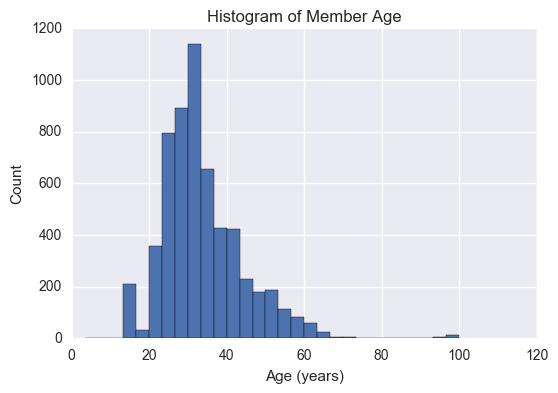

In [248]:
plt.hist(merged['age'], bins=30, range=(0,100))
plt.xlabel('Age (years)')
plt.ylabel('Count')
plt.title('Histogram of Member Age')

In [249]:
merged['age'].describe()

count    8089.000000
mean       81.923476
std       230.996610
min        16.000000
25%        28.000000
50%        36.000000
75%       112.000000
max      2016.000000
Name: age, dtype: float64

In [250]:
#Remove outlier data point with age >100
merged= merged[merged['age']<100]

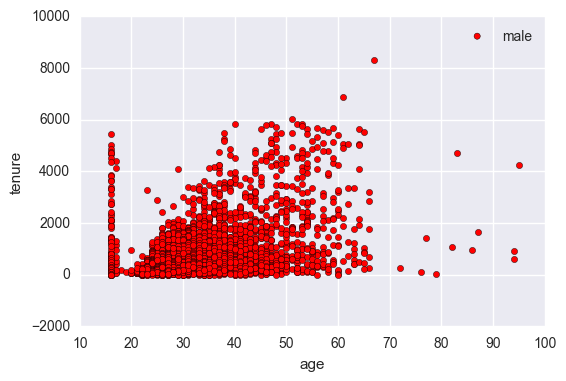

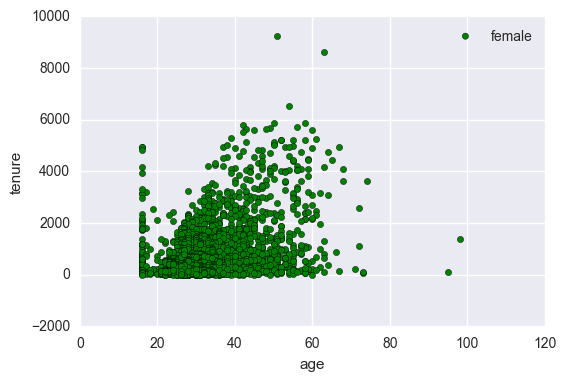

In [251]:
merged[merged['Gender']=='M'].plot(kind='scatter', x='age', y='tenure', color='r', label='male')
merged[merged['Gender']=='F'].plot(kind='scatter', x='age', y='tenure', color='g', label='female')

In [252]:
#Create Age Groups
merged['Age_Group']=np.where(merged['age']<18, 'Under 18', 
                             np.where(merged['age']>=46,'Above 46', np.where(merged['age']<=25, '19-25', 
                                                                       np.where(merged['age']<=35, '26-35', np.where(merged['age']<=45, '36-45', 'nan')))))

In [253]:
#Create Engagement
merged['Engagement']=np.where(merged['freq_CI']<13, 'Disengaged', 
                             np.where(merged['freq_CI']>=156,'Hardcore', np.where(merged['freq_CI']<52, 'Occasional', 
                                                                       np.where(merged['freq_CI']<104, 'Motivated', np.where(merged['freq_CI']<156, 'Committed', 'nan')))))

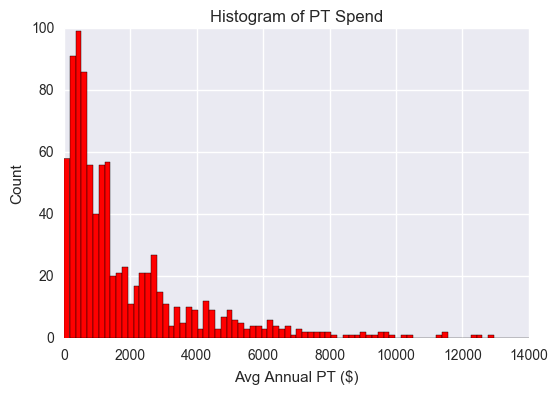

In [254]:
plt.hist(merged[merged['value_PT']>100]['value_PT'], bins=80, range=(0,14000), color='r')
plt.xlabel('Avg Annual PT ($)')
plt.ylabel('Count')
plt.title('Histogram of PT Spend')

In [255]:
#Create Groupings on PT and PL spend (?)

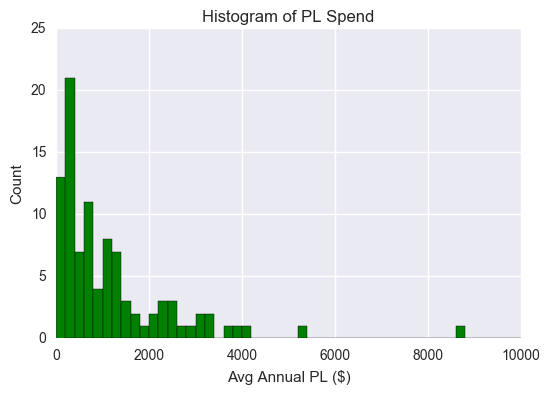

In [256]:
plt.hist(merged[merged['value_PL']>100]['value_PL'], bins=50, range=(0,10000), color='g')
plt.xlabel('Avg Annual PL ($)')
plt.ylabel('Count')
plt.title('Histogram of PL Spend')

In [257]:
merged['Engagement'].value_counts()

Occasional    2352
Disengaged    1491
Motivated     1272
Committed      426
Hardcore       167
nan            126
Name: Engagement, dtype: int64

In [258]:
merged['Age_Group'].value_counts()

26-35       2759
36-45       1233
19-25        858
Above 46     749
Under 18     235
Name: Age_Group, dtype: int64

In [259]:
merged=merged[merged['Access']!='Unknown']
merged['Access'].value_counts()

All Access     3006
Select         2545
Destination      47
Executive        27
Name: Access, dtype: int64

In [260]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5625 entries, 0 to 8087
Data columns (total 27 columns):
Member Id           5625 non-null object
Gender              5623 non-null object
facility            5625 non-null object
Access              5625 non-null object
Size                5625 non-null object
USF                 5625 non-null int64
Membership Base     5625 non-null object
Club Type           5625 non-null object
Capacity Status     5625 non-null object
Region              5625 non-null object
SameStore           5625 non-null object
Birth year          5625 non-null int64
value_PT            5499 non-null float64
# months            5499 non-null float64
freq_PL             5499 non-null float64
Year                5499 non-null float64
current_mbr         5499 non-null object
freq_CI             5499 non-null float64
tenure              5499 non-null float64
PriceInd            5499 non-null float64
value_PL            5499 non-null float64
freq_PT             5499 n

In [261]:
merged.dropna(axis=0, how='any', inplace=True)

## EDA on "merged" data

In [262]:
merged.describe()

,USF,Birth year,value_PT,# months,freq_PL,Year,freq_CI,tenure,PriceInd,value_PL,freq_PT,age,tenure (months),tenure (yrs)
count,5499.000000,5499.000000,5499.000000,5499.000000,5499.000000,5499.000000,5499.000000,5499.000000,5499.000000,5499.000000,5499.000000,5499.000000,5499.000000,5499.000000
mean,34442.992362,1982.811420,280.413340,14.959447,0.025853,2.033461,43.651452,756.540826,0.986986,19.512487,0.225829,33.188580,25.218028,2.072715
std,13392.804158,9.827796,1092.380252,12.185005,0.272127,1.055037,43.589837,923.648826,0.172775,228.402371,0.714255,9.827796,30.788294,2.530545
min,18631.000000,1918.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.659934,0.000000,0.000000,16.000000,0.000000,0.000000
25%,28027.000000,1978.000000,0.000000,5.000000,0.000000,1.000000,11.875000,171.000000,0.813837,0.000000,0.000000,27.000000,5.700000,0.468493
50%,31202.000000,1985.000000,0.000000,11.000000,0.000000,2.000000,30.500000,450.000000,1.011487,0.000000,0.000000,31.000000,15.000000,1.232877
75%,36083.000000,1989.000000,0.000000,23.000000,0.000000,3.000000,62.500000,963.500000,1.141863,0.000000,0.000000,38.000000,32.116667,2.639726
max,150000.000000,2000.000000,25488.000000,43.000000,7.000000,4.000000,433.000000,9223.000000,2.035903,8640.000000,9.000000,98.000000,307.433333,25.268493


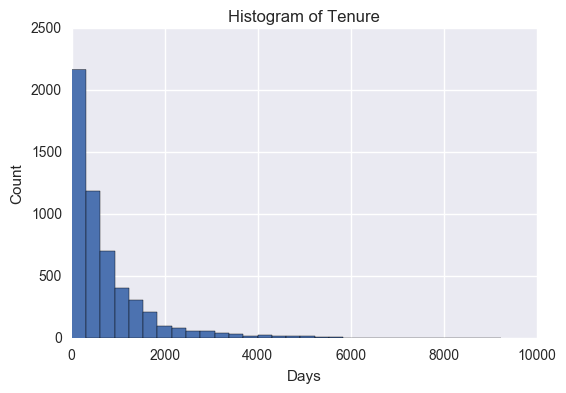

In [263]:
plt.hist(merged['tenure'], bins=30)
plt.xlabel('Days')
plt.ylabel('Count')
plt.title('Histogram of Tenure')

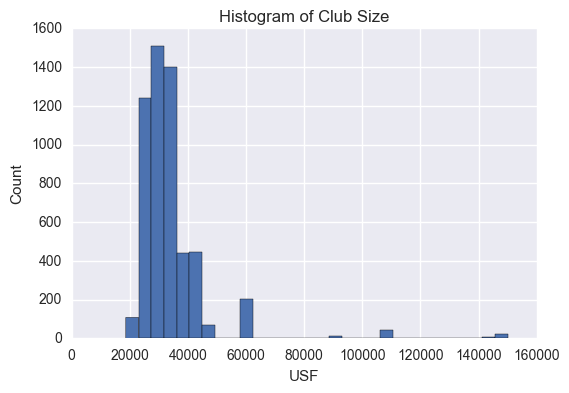

In [264]:
plt.hist(merged['USF'], bins=30)
plt.xlabel('USF')
plt.ylabel('Count')
plt.title('Histogram of Club Size')

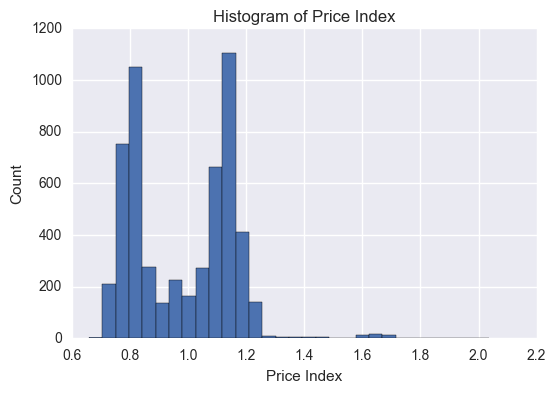

In [265]:
plt.hist(merged['PriceInd'], bins=30)
plt.xlabel('Price Index')
plt.ylabel('Count')
plt.title('Histogram of Price Index')

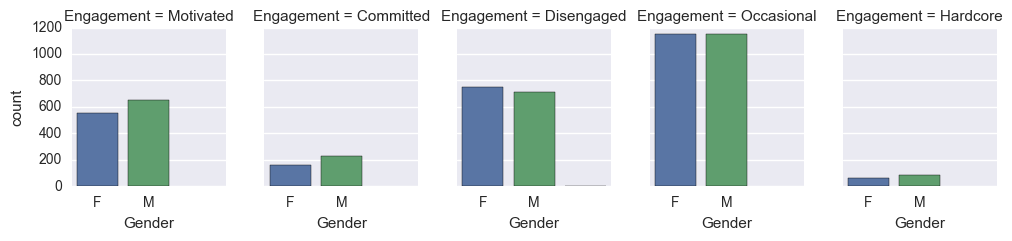

In [266]:
sns.factorplot("Gender", col="Engagement", col_wrap=5,
                    data=merged,
                    kind="count", size=2.5, aspect=.8)

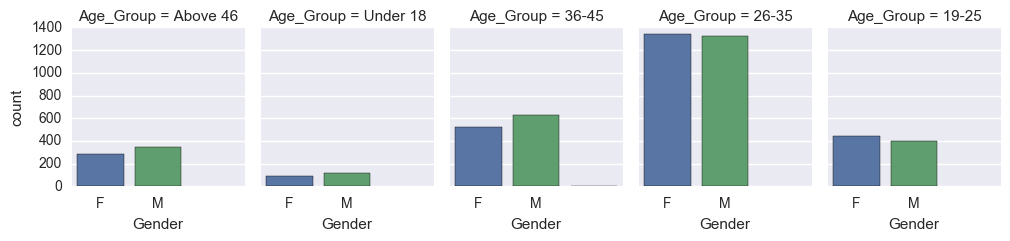

In [267]:
sns.factorplot("Gender", col="Age_Group", col_wrap=5,
                    data=merged,
                    kind="count", size=2.5, aspect=.8)

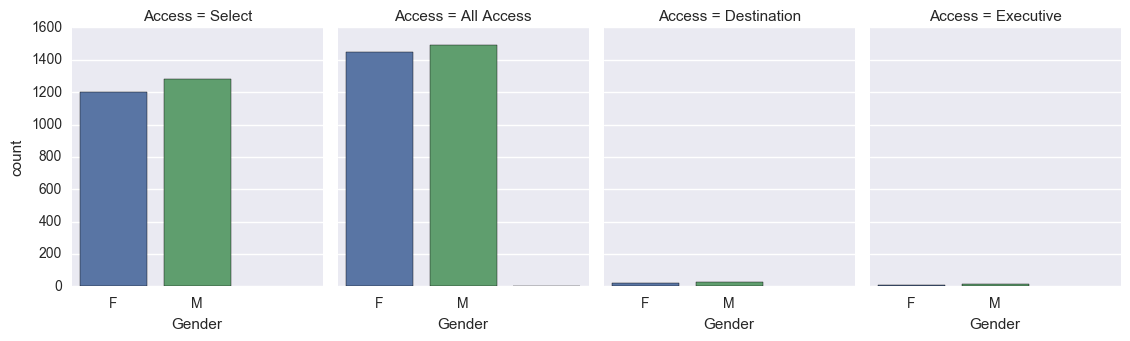

In [268]:
sns.factorplot("Gender", col="Access", col_wrap=4,
                    data=merged,
                    kind="count", size=3.5, aspect=.8)

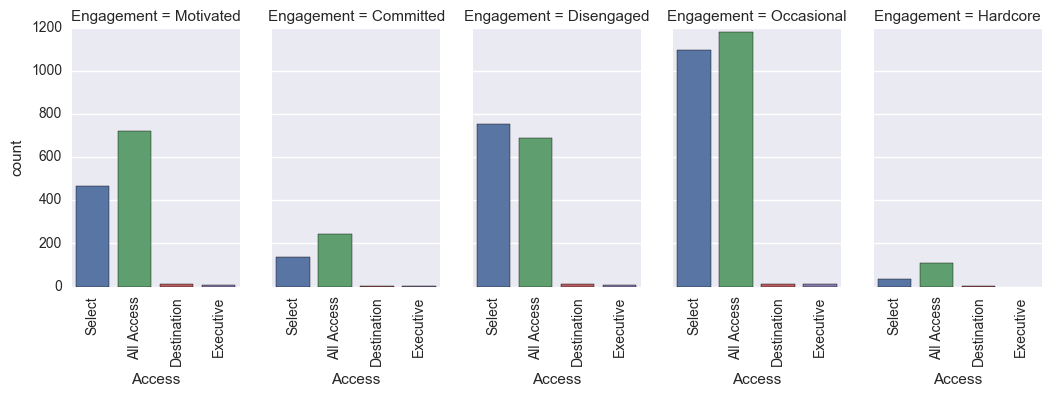

In [269]:
h=sns.factorplot("Access", col="Engagement", col_wrap=5,
                    data=merged,
                    kind="count", size=3.5, aspect=.6)
for ax in h.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(90)

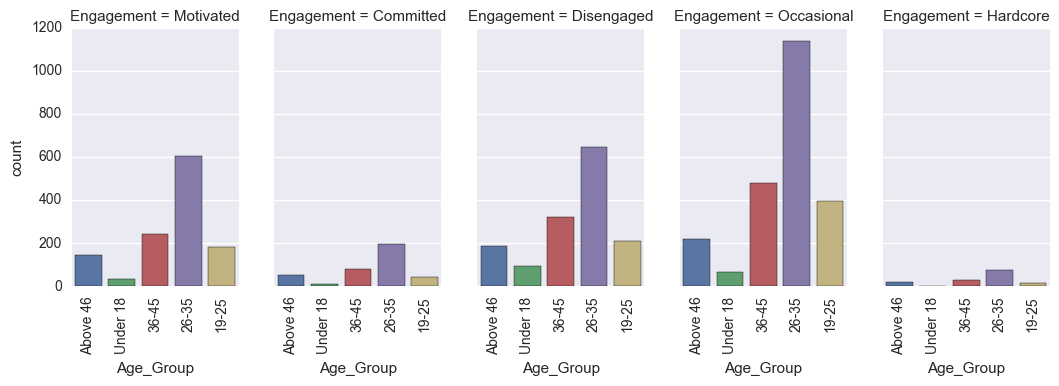

In [270]:
g=sns.factorplot("Age_Group", col="Engagement", col_wrap=5,
                    data=merged,
                    kind="count", size=3.5, aspect=.6, legend=True)
for ax in g.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(90)

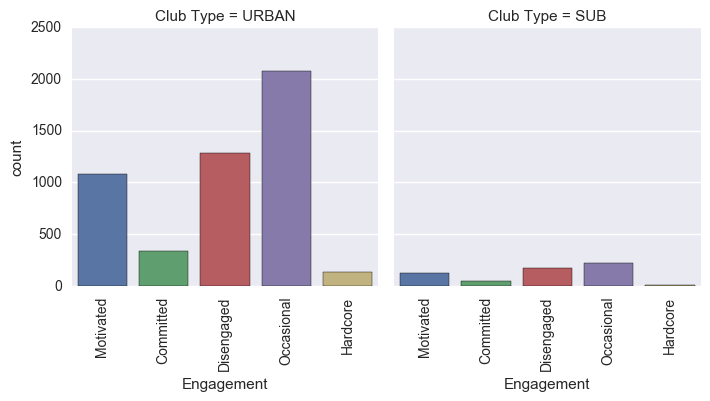

In [271]:
g=sns.factorplot("Engagement", col="Club Type", col_wrap=2,
                    data=merged,
                    kind="count", size=3.5, aspect=1, legend=True)
for ax in g.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(90)

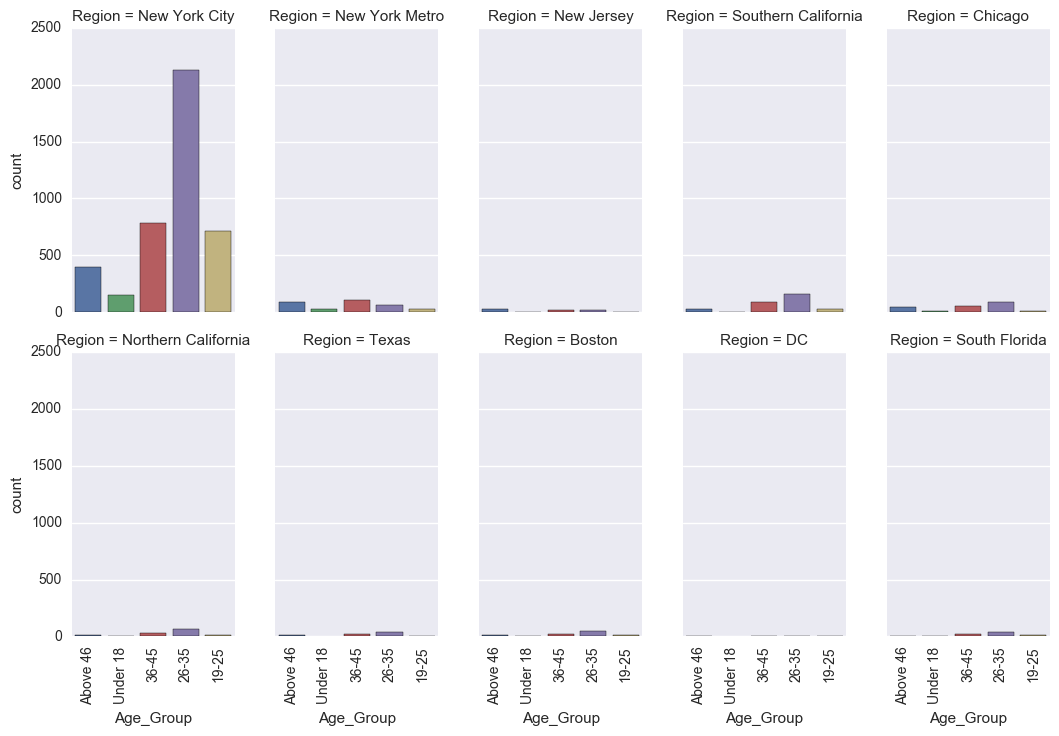

In [272]:
g=sns.factorplot("Age_Group", col="Region", col_wrap=5,
                    data=merged,
                    kind="count", size=3.5, aspect=.6, legend=True)
for ax in g.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(90)

## Features against "tenure"

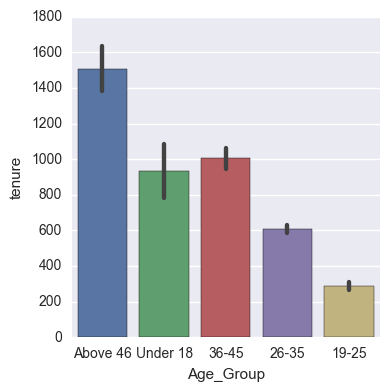

In [273]:
sns.factorplot(x="Age_Group", y="tenure", data=merged, kind="bar")

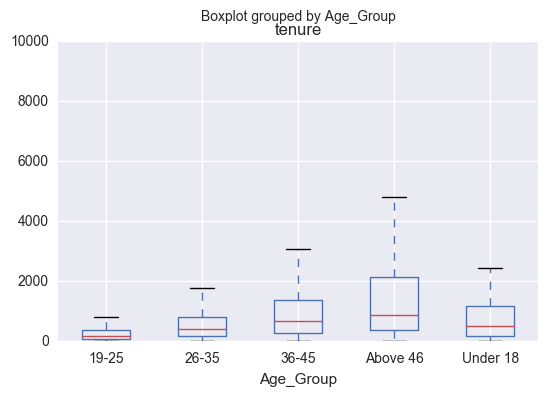

In [274]:
merged.boxplot('tenure', by='Age_Group')

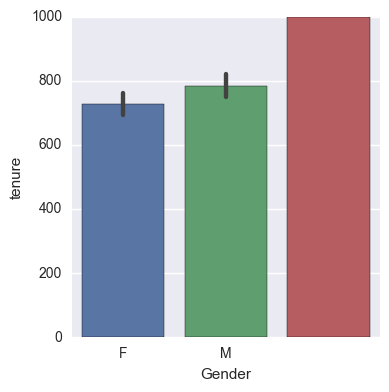

In [275]:
sns.factorplot(x="Gender", y="tenure", data=merged, kind="bar")

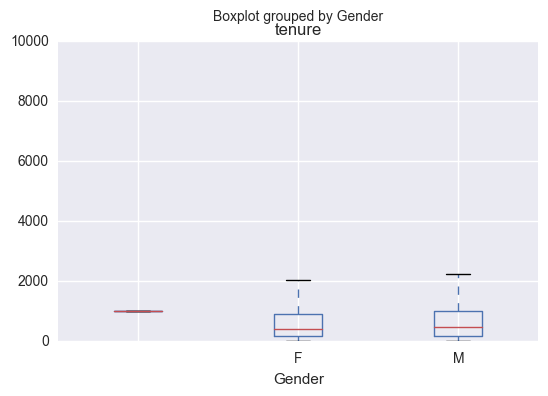

In [276]:
merged.boxplot('tenure', by='Gender')

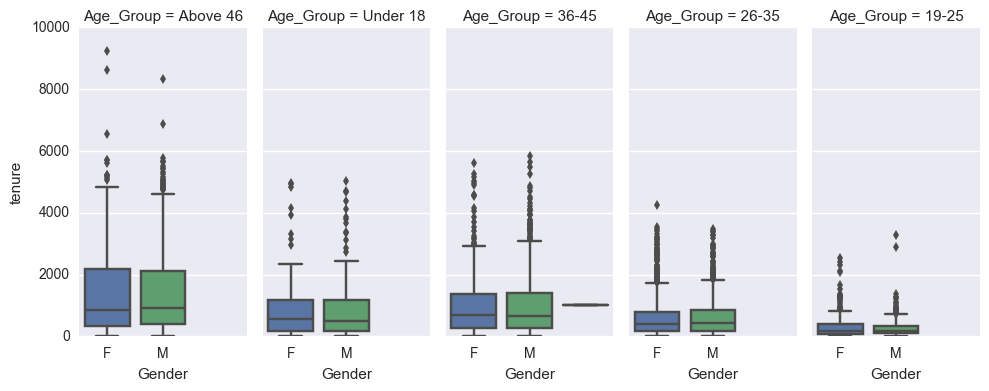

In [277]:
sns.factorplot(x="Gender", y="tenure",
               col="Age_Group", data=merged, kind="box", size=4, aspect=.5)

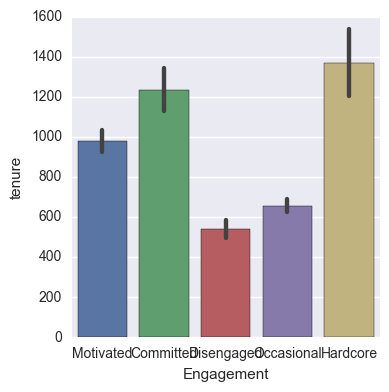

In [278]:
sns.factorplot(x="Engagement", y="tenure", data=merged, kind="bar")

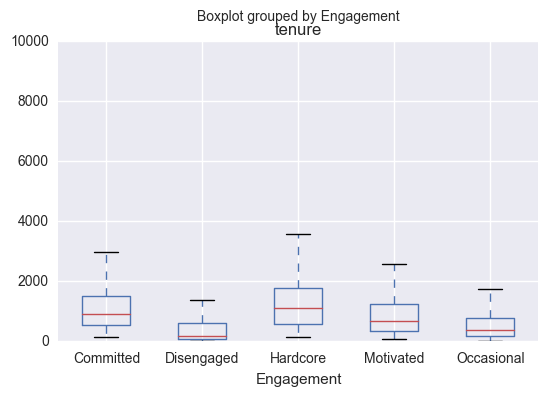

In [279]:
merged.boxplot('tenure', by='Engagement')

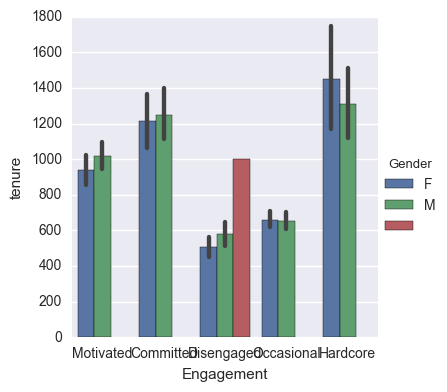

In [280]:
sns.factorplot(x="Engagement", y="tenure", hue="Gender", data=merged, kind="bar")

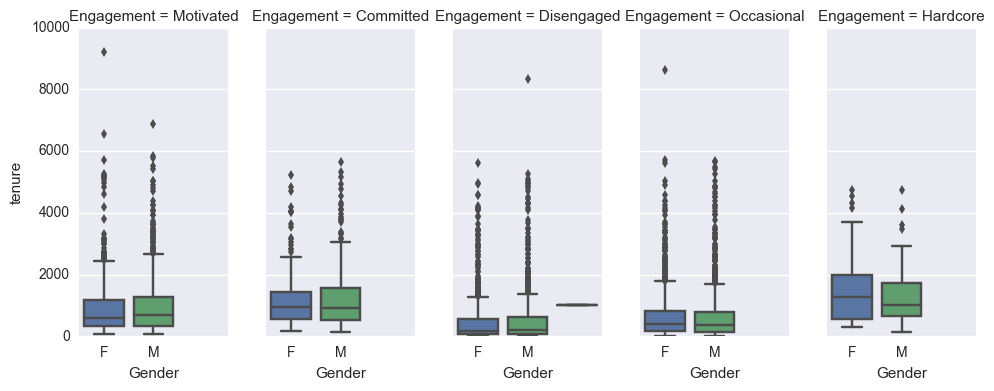

In [281]:
sns.factorplot(x="Gender", y="tenure",
               col="Engagement", data=merged, kind="box", size=4, aspect=.5);

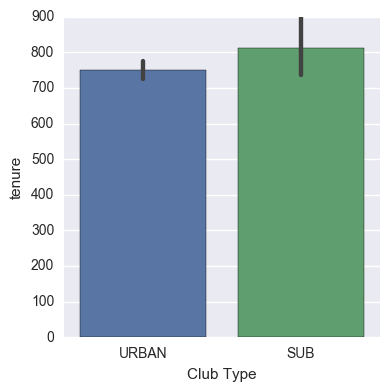

In [282]:
sns.factorplot(x="Club Type", y="tenure", data=merged, kind="bar")

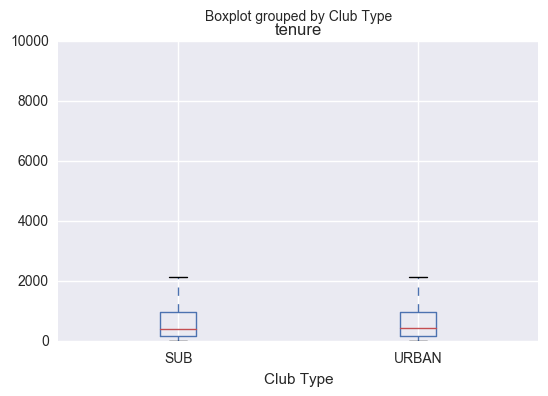

In [283]:
merged.boxplot('tenure', by='Club Type')

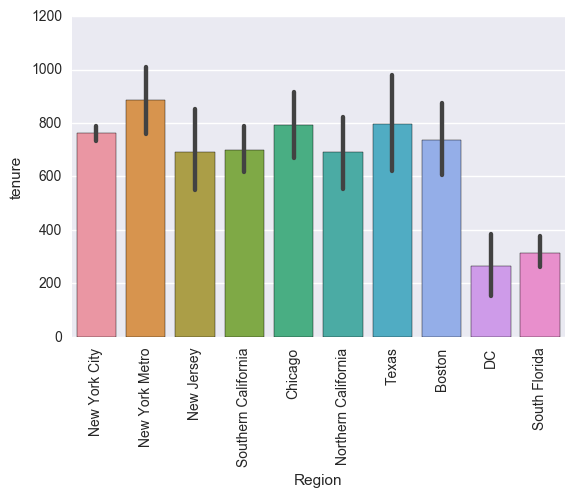

In [284]:
d=sns.factorplot(x="Region", y="tenure", data=merged, kind="bar", size=4, aspect=1.5)

for ax in d.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(90)

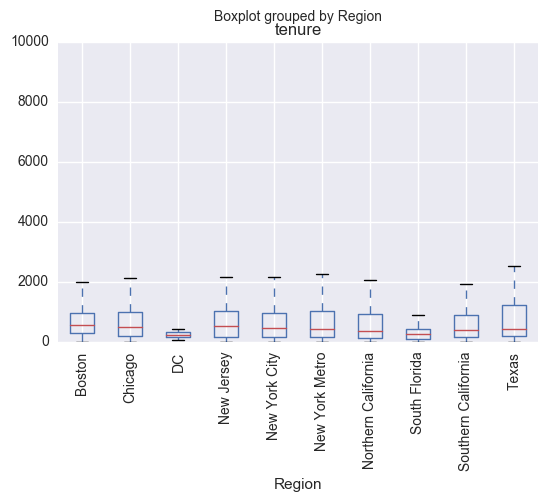

In [285]:
merged.boxplot('tenure', by='Region', rot=90)

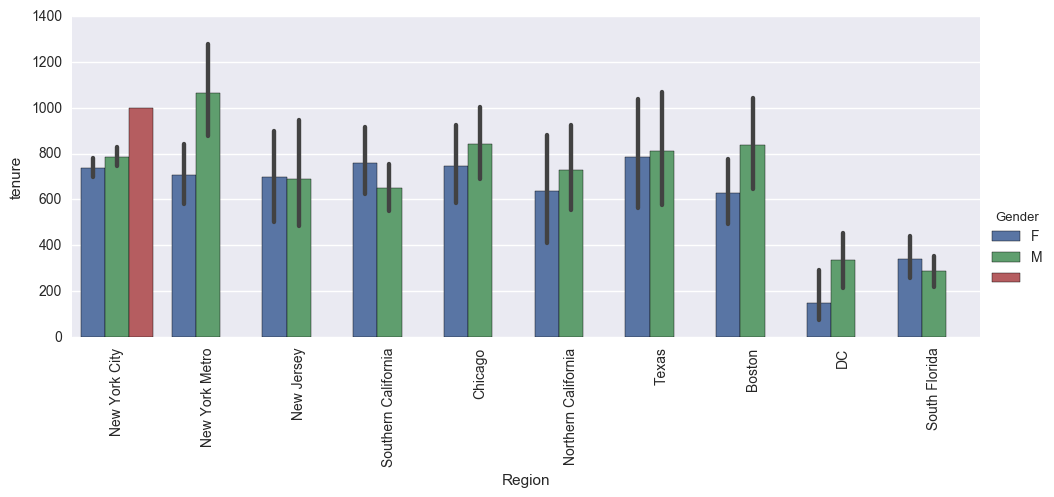

In [286]:
m=sns.factorplot(x="Region", y="tenure", hue="Gender", data=merged, kind="bar", size=4, aspect=2.5)

for ax in m.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(90)

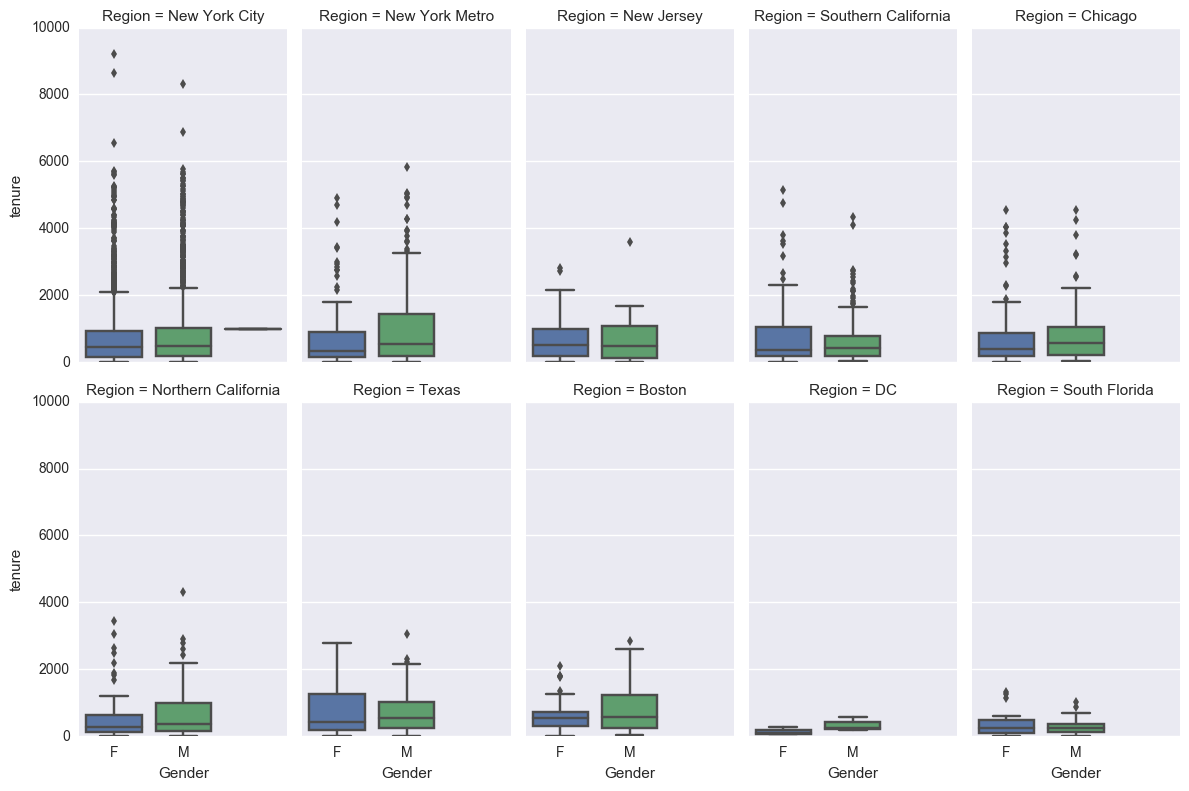

In [287]:
sns.factorplot(x="Gender", y="tenure",
               col="Region", data=merged, kind="box", col_wrap=5, size=4, aspect=0.6)

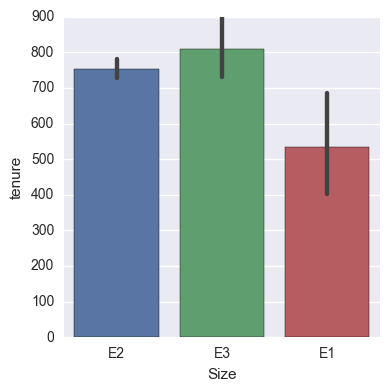

In [288]:
sns.factorplot(x="Size", y="tenure", data=merged, kind="bar")

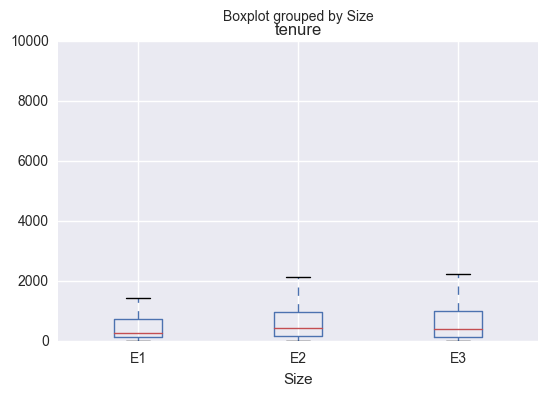

In [289]:
merged.boxplot('tenure', by='Size')

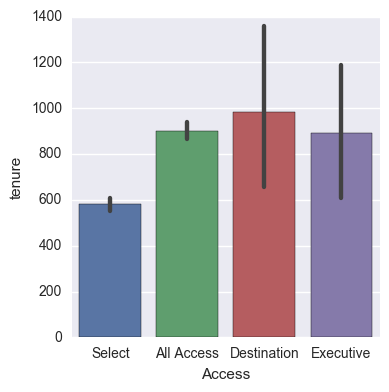

In [290]:
sns.factorplot(x="Access", y="tenure", data=merged, kind="bar")

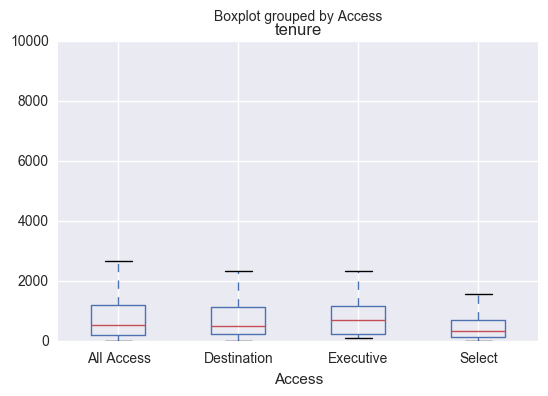

In [291]:
merged.boxplot('tenure', by='Access')

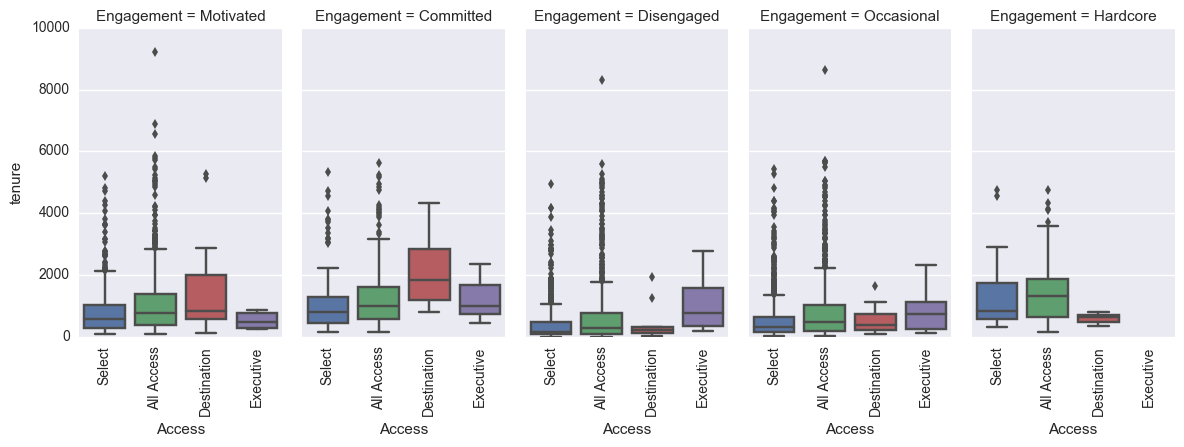

In [292]:
t=sns.factorplot(x="Access", y="tenure",
               col="Engagement", data=merged, kind="box", col_wrap=5, size=4, aspect=0.6)

for ax in t.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(90)

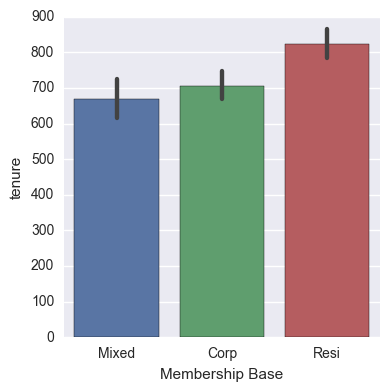

In [293]:
sns.factorplot(x="Membership Base", y="tenure", data=merged, kind="bar")

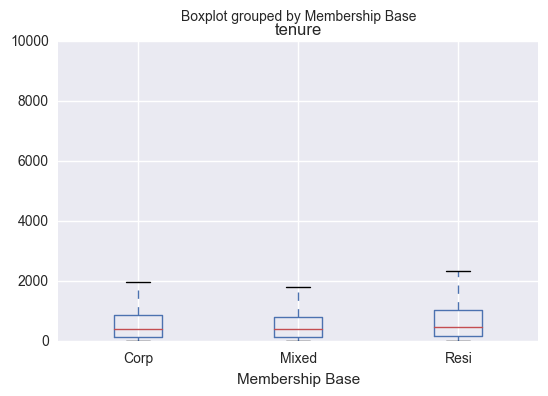

In [294]:
merged.boxplot('tenure', by='Membership Base')

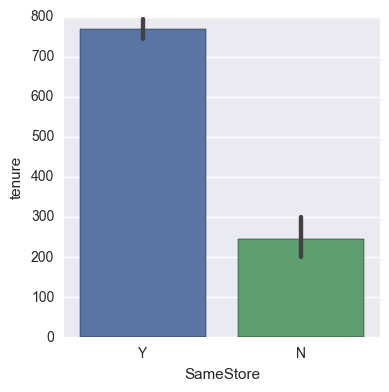

In [295]:
sns.factorplot(x="SameStore", y="tenure", data=merged, kind="bar")

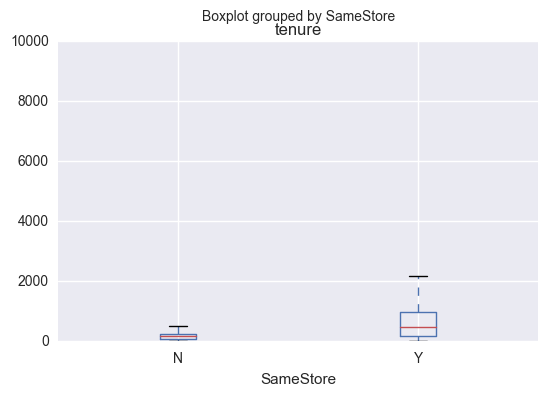

In [296]:
merged.boxplot('tenure', by='SameStore')

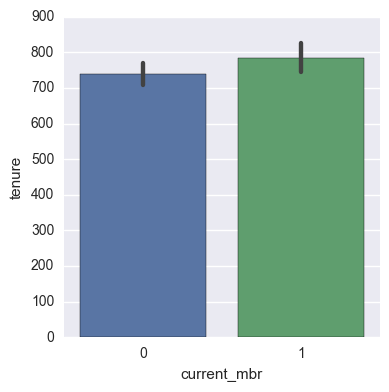

In [297]:
sns.factorplot(x="current_mbr", y="tenure", data=merged, kind="bar")

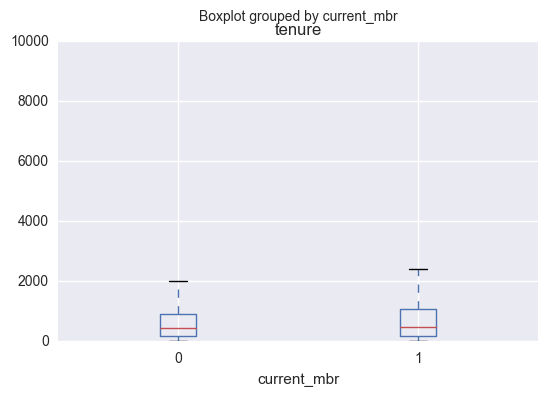

In [298]:
merged.boxplot('tenure', by='current_mbr')

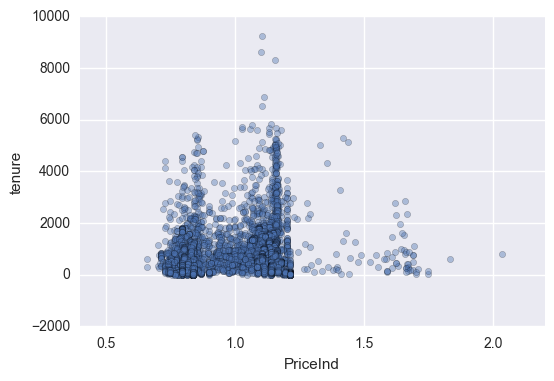

In [299]:
merged.plot.scatter('PriceInd', 'tenure', alpha=0.4)

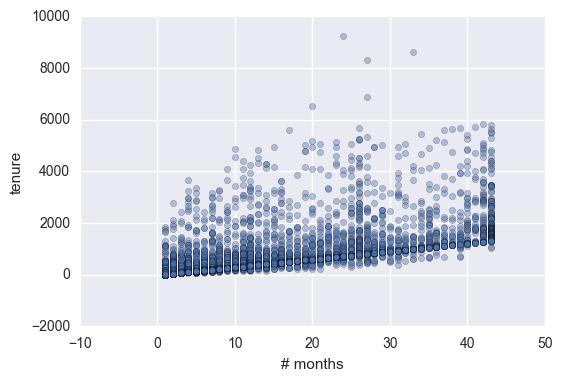

In [300]:
merged.plot.scatter('# months', 'tenure', alpha=0.4)

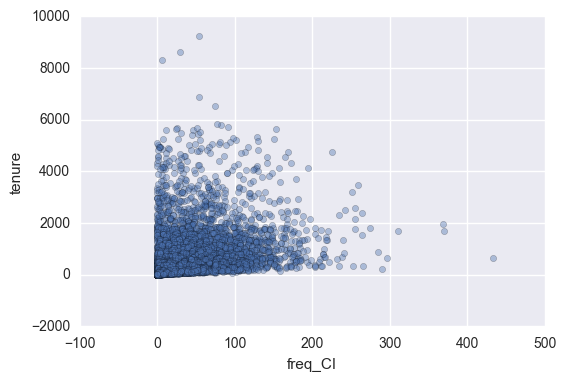

In [301]:
merged.plot.scatter('freq_CI', 'tenure', alpha=0.4)

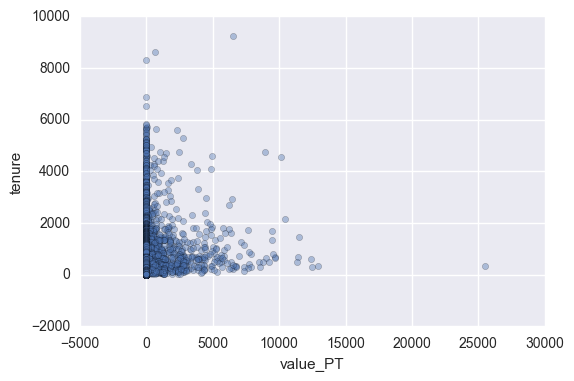

In [302]:
merged.plot.scatter('value_PT', 'tenure', alpha=0.4)

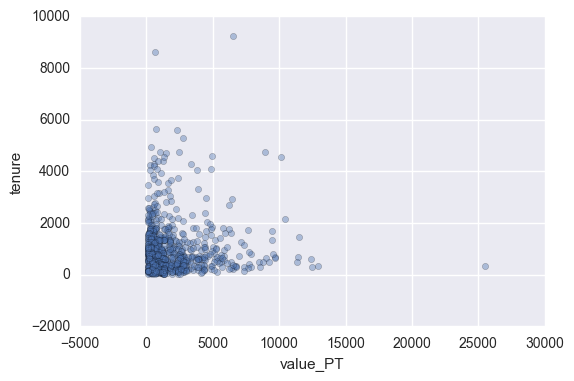

In [303]:
## Scatterplot of tenure vs. PT spend (for only PT users)
merged[merged['value_PT']>100].plot.scatter('value_PT', 'tenure', alpha=0.4)

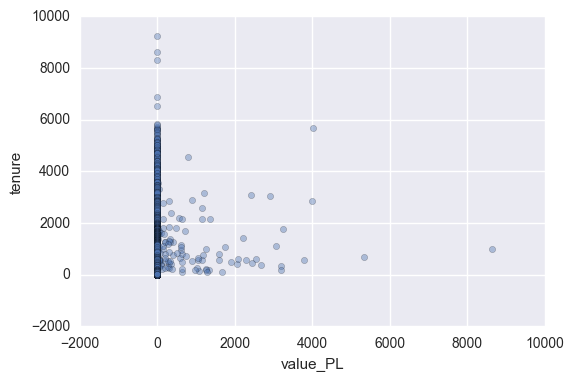

In [304]:
merged.plot.scatter('value_PL', 'tenure', alpha=0.4)

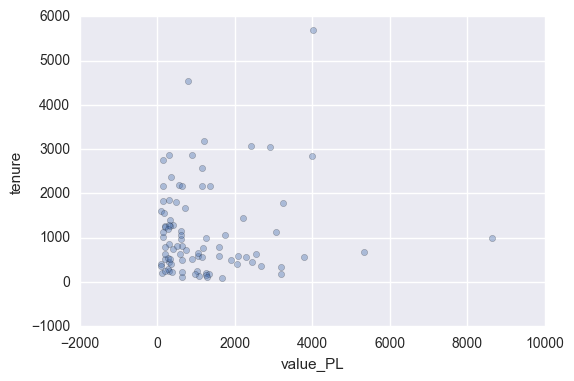

In [305]:
merged[merged['value_PL']>100].plot.scatter('value_PL', 'tenure', alpha=0.4)

In [306]:
merged.head(2)

,Member Id,Gender,facility,Access,Size,USF,Membership Base,Club Type,Capacity Status,Region,...,freq_CI,tenure,PriceInd,value_PL,freq_PT,age,tenure (months),tenure (yrs),Age_Group,Engagement
0,1000006587,F,106,Select,E2,26108,Mixed,URBAN,NC,New York City,...,55.0,5203.0,0.854748,0.0,0.333333,55,173.433333,14.254795,Above 46,Motivated
1,1000006588,M,106,Select,E2,26108,Mixed,URBAN,NC,New York City,...,129.0,5325.0,0.856160,0.0,0.000000,56,177.500000,14.589041,Above 46,Committed


In [307]:
X_viz = merged[['Gender', '# months' , 'Access', 'Club Type', 'Region', 'freq_CI' , 'value_PT', 'freq_PL', 'Engagement', 'value_PL', 'freq_PT', 'age', 'PriceInd', 'tenure']]

In [308]:
corr=X_viz.corr()

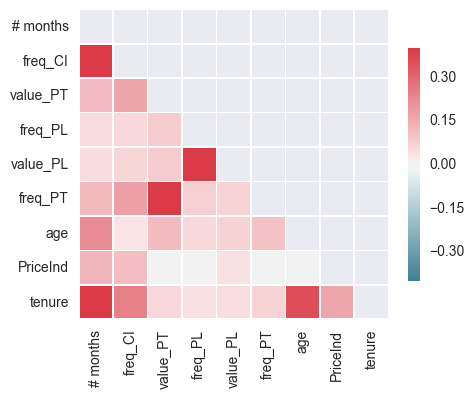

In [309]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(5, 6))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.4,
            square=True, xticklabels=True, yticklabels=True,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

In [310]:
corr

,# months,freq_CI,value_PT,freq_PL,value_PL,freq_PT,age,PriceInd,tenure
# months,1.000000,0.432337,0.116498,0.049597,0.048046,0.124936,0.221408,0.132610,0.612743
freq_CI,0.432337,1.000000,0.165690,0.053739,0.060490,0.179065,0.032382,0.115464,0.249029
value_PT,0.116498,0.165690,1.000000,0.082654,0.083381,0.834698,0.116245,-0.007542,0.058167
freq_PL,0.049597,0.053739,0.082654,1.000000,0.771789,0.076713,0.053202,0.008092,0.041108
value_PL,0.048046,0.060490,0.083381,0.771789,1.000000,0.067053,0.070415,0.039549,0.045582
freq_PT,0.124936,0.179065,0.834698,0.076713,0.067053,1.000000,0.104510,-0.007362,0.066973
age,0.221408,0.032382,0.116245,0.053202,0.070415,0.104510,1.000000,0.006037,0.356453
PriceInd,0.132610,0.115464,-0.007542,0.008092,0.039549,-0.007362,0.006037,1.000000,0.163237
tenure,0.612743,0.249029,0.058167,0.041108,0.045582,0.066973,0.356453,0.163237,1.000000
